In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#### Загрузка данных

In [2]:
train_data = pd.read_csv('train_data.csv')
train_data

,customer_ID,S_2,D_39,B_1,R_1,S_3,D_47,B_7,B_11,S_8,...,B_23,R_10,B_33,D_103,D_107,B_38,D_114,D_117,D_122,D_124
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0,0.008724,0.009228,0.124035,0.525351,0.059416,0.002768,2896,...,0.050882,0,1,1,2,2,1,5,3,16
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0,0.004923,0.006151,0.126750,0.521311,0.057744,0.002749,2896,...,0.040469,0,1,1,2,2,1,5,3,16
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,3,0.021655,0.006815,0.123977,0.524568,0.056647,0.010077,3166,...,0.047454,0,1,1,2,2,1,5,3,16
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0,0.013683,0.001373,0.117169,0.530929,0.049253,0.009667,2218,...,0.031705,0,1,1,2,2,1,5,3,16
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0,0.015193,0.007605,0.117325,0.529305,0.048918,0.009484,2896,...,0.032733,0,1,1,2,2,1,5,3,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5531446,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2017-11-05,14,0.020818,0.003487,0.090743,0.530723,0.018121,0.010752,2218,...,0.009346,0,0,0,0,3,1,4,2,11
5531447,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2017-12-23,10,0.007209,0.005904,0.079886,0.534473,0.021853,0.005119,2218,...,0.007823,0,1,0,0,3,1,4,3,11
5531448,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2018-01-06,15,0.013151,0.003457,0.100503,0.530051,0.016139,0.008121,1021,...,0.013041,0,1,0,0,3,1,4,3,11
5531449,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2018-02-06,15,0.009855,0.005117,0.101802,0.531355,0.014798,0.007431,1021,...,0.001800,0,1,0,0,3,1,4,3,11


In [3]:
del train_data['S_2']

In [4]:
train_data = train_data.drop_duplicates(['customer_ID'])

In [5]:
train_labels = pd.read_csv('train_labels.csv')
train_labels

,customer_ID,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0
...,...,...
458908,ffff41c8a52833b56430603969b9ca48d208e7c192c6a4...,0
458909,ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fd...,0
458910,ffff9984b999fccb2b6127635ed0736dda94e544e67e02...,0
458911,ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814...,1


In [6]:
train_data_merged = pd.merge(train_data, train_labels) 

#### Корреляция с target

In [7]:
corr = train_data_merged.corr()
corr.style.background_gradient(cmap = 'coolwarm')

,D_39,B_1,R_1,S_3,D_47,B_7,B_11,S_8,D_58,D_60,D_64,B_16,S_13,S_15,B_23,R_10,B_33,D_103,D_107,B_38,D_114,D_117,D_122,D_124,target
D_39,1.000000,0.150464,0.119952,0.010253,0.083734,0.056731,0.149705,0.196337,0.109679,0.118826,0.085660,0.208358,0.197874,-0.124279,0.066812,0.058759,-0.230846,0.133425,0.124447,0.197430,0.130686,0.098440,0.110637,0.122233,0.065835
B_1,0.150464,1.000000,0.188871,0.134944,-0.065638,0.572062,0.993492,0.028207,0.322440,0.114690,0.042709,0.525816,0.036944,0.005200,0.577148,0.101735,-0.514117,0.057821,0.061760,0.510291,-0.030491,-0.024857,-0.028261,0.024777,0.282280
R_1,0.119952,0.188871,1.000000,0.180138,-0.052605,0.200031,0.183558,-0.042270,0.265202,-0.045915,0.057333,0.204817,-0.011830,0.060381,0.207979,0.565895,-0.226986,0.087812,0.091981,0.196128,0.000622,-0.001480,-0.007031,0.061831,0.255089
S_3,0.010253,0.134944,0.180138,1.000000,-0.198114,0.161586,0.121410,-0.392919,0.169308,-0.076869,0.031292,0.085147,-0.157150,0.455350,0.149214,0.077656,-0.149069,-0.009814,0.000390,0.085976,-0.154187,-0.133859,-0.138881,-0.078260,0.289238
D_47,0.083734,-0.065638,-0.052605,-0.198114,1.000000,-0.097735,-0.046467,0.123704,-0.011691,-0.065818,0.014974,0.020226,0.074696,-0.147229,-0.069031,-0.036546,0.065172,0.171228,0.136771,0.039913,0.445714,0.248607,0.411897,0.260425,-0.283590
B_7,0.056731,0.572062,0.200031,0.161586,-0.097735,1.000000,0.554267,-0.128232,0.583817,-0.252813,-0.001171,0.425631,-0.128009,0.109420,0.993987,0.133094,-0.400069,-0.009010,0.009981,0.375808,-0.103124,-0.089786,-0.087239,-0.016060,0.329188
B_11,0.149705,0.993492,0.183558,0.121410,-0.046467,0.554267,1.000000,0.026068,0.311219,0.114136,0.046516,0.515918,0.037563,0.002703,0.564063,0.096347,-0.495455,0.067278,0.069997,0.497433,-0.010479,-0.010373,-0.011926,0.037420,0.264978
S_8,0.196337,0.028207,-0.042270,-0.392919,0.123704,-0.128232,0.026068,1.000000,-0.129424,0.338585,-0.022455,-0.011313,0.692061,-0.792385,-0.119052,-0.036230,-0.013308,0.019617,0.021881,-0.004487,0.083623,0.088469,0.075930,0.074245,-0.137588
D_58,0.109679,0.322440,0.265202,0.169308,-0.011691,0.583817,0.311219,-0.129424,1.000000,-0.418658,0.114824,0.504298,-0.114259,0.108848,0.613798,0.226432,-0.447848,0.228596,0.234676,0.430800,0.069947,0.032516,0.058712,0.160802,0.346554
D_60,0.118826,0.114690,-0.045915,-0.076869,-0.065818,-0.252813,0.114136,0.338585,-0.418658,1.000000,-0.007979,-0.010043,0.401794,-0.186082,-0.254583,-0.066681,-0.033457,-0.105753,-0.097161,0.001451,-0.070175,-0.028026,-0.061567,-0.058248,-0.050313


In [9]:
corr = ['D_39', 'D_60', 'D_64', 'S_13', 'D_103', 'D_107', 'D_124']
for i in range(len(corr)):
    del train_data_merged[corr[i]]
train_data_merged.shape

(458913, 19)

#### Графики

In [10]:
all_series = {}
for i in range(2, len(train_data_merged.columns)):
    all_series[train_data_merged.columns[i]] = train_data_merged[train_data_merged.columns[i]]

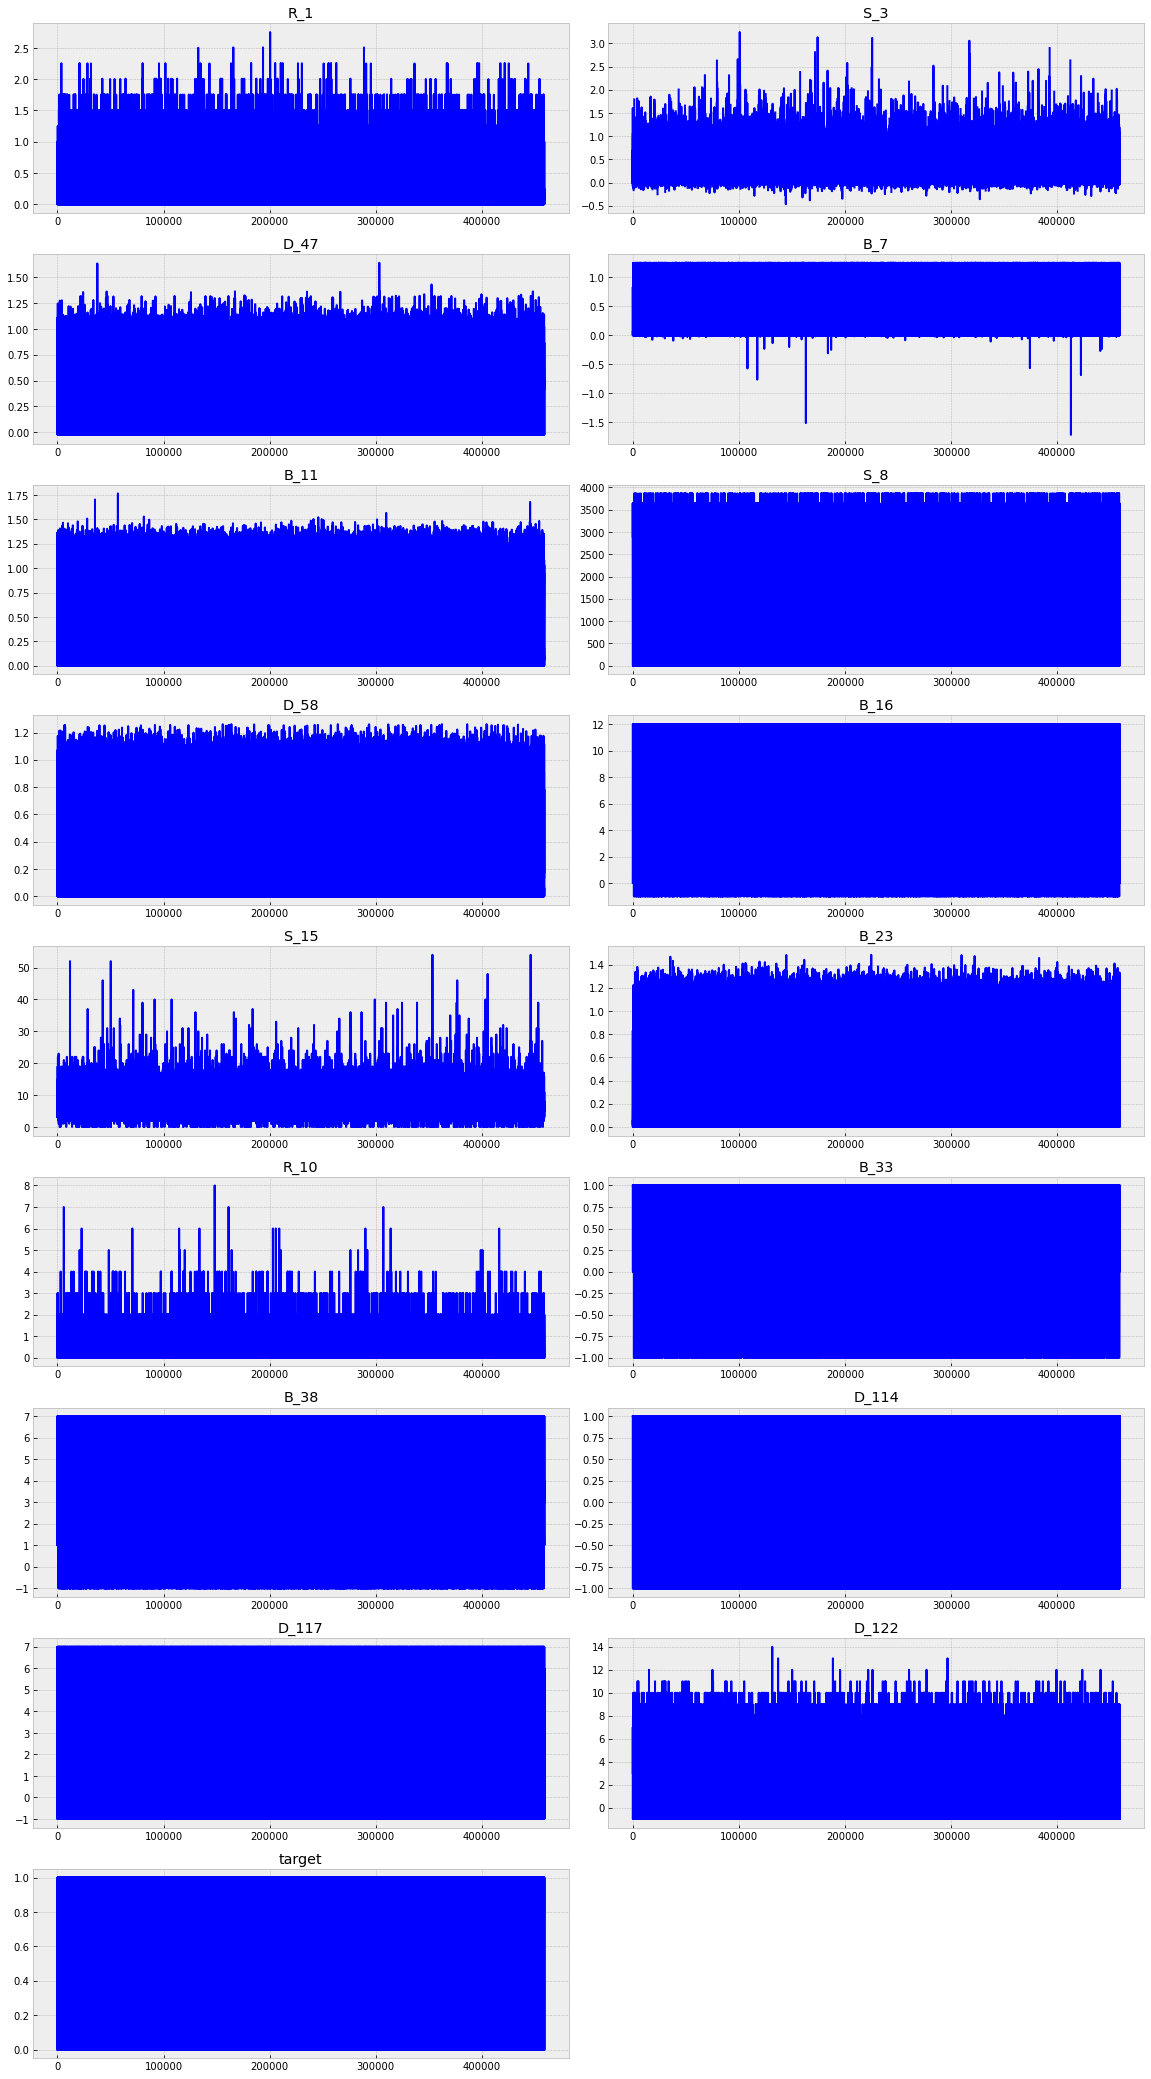

In [11]:
with plt.style.context('bmh'):
    plt.figure(figsize = (16, 32))
    layout = (10, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)
        
        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax = ts_ax, color = 'blue')
        ts_ax.set_title(key)
        
    plt.tight_layout()

In [12]:
graf = ['B_16', 'B_33', 'B_38', 'D_114', 'D_117']
for i in range(len(graf)):
    del train_data_merged[graf[i]]
train_data_merged.shape

(458913, 14)

In [13]:
table = train_data_merged.set_index('customer_ID')

In [14]:
table.to_csv('train_data_1.csv')

In [15]:
table

,B_1,R_1,S_3,D_47,B_7,B_11,S_8,D_58,S_15,B_23,R_10,D_122,target
customer_ID,,,,,,,,,,,,,
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,0.008724,0.009228,0.124035,0.525351,0.059416,0.002768,2896,0.158612,4,0.050882,0,3,0
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5,0.025782,0.005515,0.089799,0.382562,0.032390,0.011677,1880,0.007069,5,0.014834,0,2,0
00001b22f846c82c51f6e3958ccd81970162bae8b007e80662ef27519fcc18c1,0.001472,0.005955,NaN,0.318290,0.029138,0.001677,0,0.079300,8,0.022871,0,1,0
000041bdba6ecadd89a52d11886e8eaaec9325906c9723355abb5ca523658edc,0.070311,0.004228,0.407420,0.392230,0.252338,0.043140,1454,0.006255,6,0.214540,0,3,0
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad51ca8b8c4a24cefed,0.003433,0.007243,0.166190,0.465739,0.035662,0.009522,0,0.335621,8,0.024060,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffff41c8a52833b56430603969b9ca48d208e7c192c6a4081a6acc28cf4f8af7,0.006084,0.009374,0.106511,0.199892,0.033493,0.003090,2380,0.009221,5,0.022149,0,6,0
ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fdd3e5b57cfcbee30286,0.431408,0.004702,0.324895,0.753185,0.335496,0.378606,0,0.426619,8,0.316597,0,2,0
ffff9984b999fccb2b6127635ed0736dda94e544e67e026eee4d20f680639ff6,0.063875,0.007620,0.084054,0.309093,0.042889,0.045848,2896,0.005257,4,0.032193,0,1,0
